#EDA- Titanic

How many rows and columns are there in the dataset?

What does each column represent?

Which column is the target variable?

What are the data types of each column?

How many numerical and categorical features are present?

Are there any duplicate rows?

What is the overall survival rate of passengers?

What percentage of passengers did not survive?

Which columns contain missing values?

What percentage of missing values are present in each column?

Why might Age have missing values?

Why does Cabin have a large number of missing values?

How would you handle missing values in:

Age

Embarked

Cabin

Is it better to drop or impute missing values for this dataset?

What impact can missing data have on model performance?

What is the distribution of passenger ages?

What is the average (mean) age of passengers?

What is the median age? Is it different from the mean?

Are there any outliers in Fare?

What is the maximum and minimum fare paid?

Is the fare distribution skewed?

How many passengers belong to each passenger class?

How many male and female passengers are there?

What are the counts of passengers from each embarkation port?

Which cabin class has the highest number of passengers?

What is the survival rate by gender?

What is the survival rate by passenger class?

How does survival vary with age?

Did passengers traveling with family survive more?

How does fare affect survival chances?

Is there a relationship between embarkation port and survival?

Do children have a higher survival rate than adults?

How does survival differ for solo travelers vs those with family?

#Data Set Insertion
#Data Set Understanding
#Data Cleaning and Preprocessing

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#Inserting data

data = pd.read_csv('/content/titanic.csv')
data.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [144]:
#Q1,2.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


In [145]:
#Q3.

print('Target Variable: ','Parch')

Target Variable:  Parch


In [146]:
#Q4.

data.dtypes

,0
survived,int64
pclass,int64
name,object
sex,object
age,float64
fare,float64
sibsp,int64
parch,int64


In [147]:
#Q5.

num_ft = data.select_dtypes(include=['int64','float64']).shape[1]
cat_ft = data.select_dtypes(include=['object','category']).shape[1]
print('Numerical Features: ',num_ft)
print('Categorical Features: ',cat_ft)

Numerical Features:  6
Categorical Features:  2


In [148]:
#Q6.
print('Number of duplicate Rows: ',data.duplicated().sum())

Number of duplicate Rows:  0


In [149]:
#Q7, 8.

survival_rate = data['survived'].mean()*100
print('Survival Rate: ',survival_rate,'%')

death_rate = ( 1- data['survived'].mean())*100
print('Rate of non survival: ',death_rate,'%')

Survival Rate:  40.61624649859944 %
Rate of non survival:  59.38375350140056 %


In [150]:
#Q9.values in each column

data.isnull().sum()

,0
survived,0
pclass,0
name,0
sex,0
age,0
fare,0
sibsp,0
parch,0


In [151]:
#Q10. Percentage in each column

data.isnull().mean()*100

,0
survived,0.0
pclass,0.0
name,0.0
sex,0.0
age,0.0
fare,0.0
sibsp,0.0
parch,0.0


In [152]:
#Q13.

print('Number of Null Values (False:0/True:possible):',data['age'].isnull().any())

Number of Null Values (False:0/True:possible): False


In [153]:
data.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch'], dtype='object')

In [154]:
#Q14,15

'''There is no column named as Cabin and embarked in this data set and data set is totally cleaning without any missing value still
 i am give option to fill missing values in age column using median value replacement'''

data['age'].fillna(data['age'].median(), inplace=True)





/tmp/ipython-input-1551755373.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [155]:
#Q16,17

'''
Impute missing values rather than drop them for this dataset, because it is relatively small and key features (like age) are important.
Dropping rows would remove too much useful information.

Impact of missing data on model performance:

Can reduce accuracy if important patterns are lost

Can bias the model if missingness is not random

Many models cannot handle missing values directly, causing errors or poor results
'''

'\nImpute missing values rather than drop them for this dataset, because it is relatively small and key features (like age) are important.\nDropping rows would remove too much useful information.\n\nImpact of missing data on model performance:\n\nCan reduce accuracy if important patterns are lost\n\nCan bias the model if missingness is not random\n\nMany models cannot handle missing values directly, causing errors or poor results\n'

Text(0.5, 1.0, 'Distribution of passenger ages')

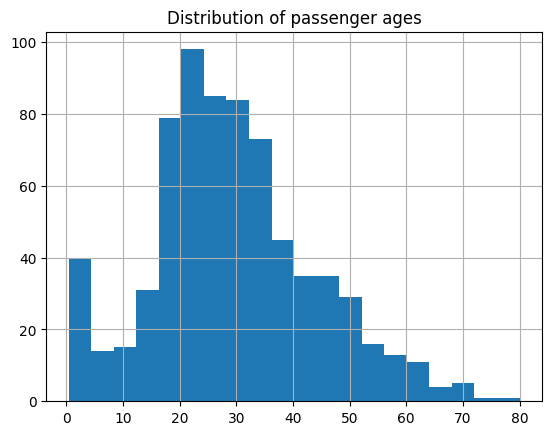

In [156]:
#Q18

data['age'].describe()

data['age'].hist(bins=20)
plt.title('Distribution of passenger ages')


In [157]:
#Q19.

print('Mean value of age column: ',data['age'].mean())

Mean value of age column:  29.69911764705882


In [158]:
#Q20.

print('Mean value of age column: ',data['age'].median())

print('Mean and Median both having different values in this dataset.')

Mean value of age column:  28.0
Mean and Median both having different values in this dataset.


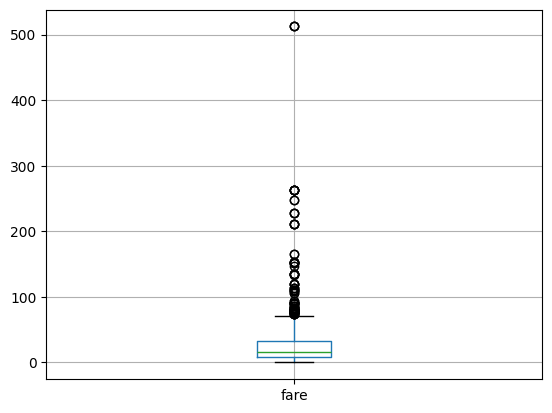

In [159]:
#Q21.


data.boxplot(column='fare')
plt.show()



In [160]:
#Q22.

print('Min. Fare paid: ',data['fare'].min())
print('Max. Fare paid: ',data['fare'].max())

Min. Fare paid:  0.0
Max. Fare paid:  512.3292


<Axes: >

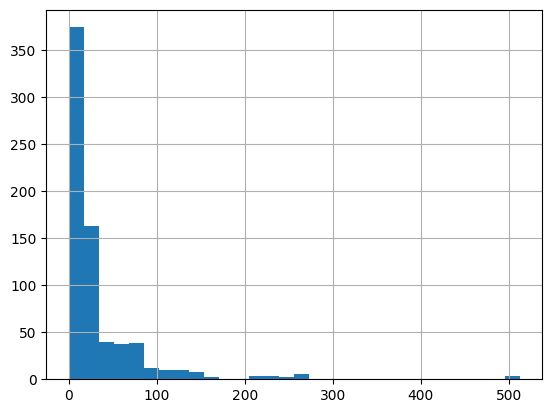

In [161]:
#Q23.

data['fare'].hist(bins=30)
#Right skewed fare data

<Axes: >

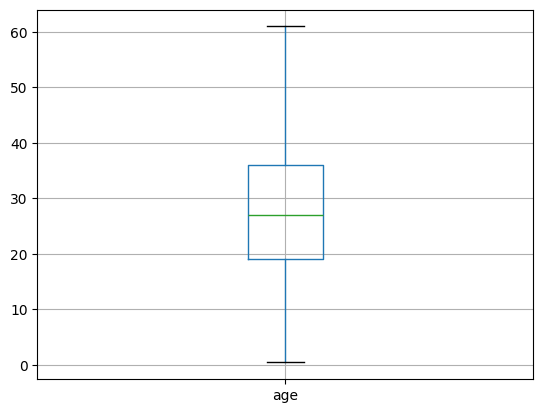

In [191]:
#Removing outliers of age and fare column

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5

data = data[(data['age']>=lower) & (data['age']<=upper)]

data.boxplot(column='age')

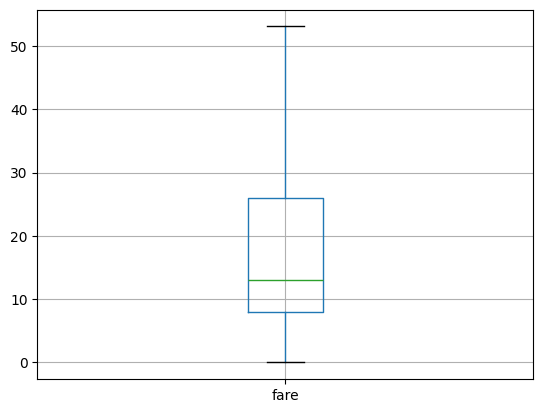

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     545 non-null    int64   
 1   pclass       545 non-null    int64   
 2   sex          545 non-null    int64   
 3   age          545 non-null    float64 
 4   fare         545 non-null    float64 
 5   sibsp        545 non-null    int64   
 6   parch        545 non-null    int64   
 7   fare_bin     545 non-null    category
 8   age_group    538 non-null    category
 9   family_size  545 non-null    int64   
dtypes: category(2), float64(2), int64(6)
memory usage: 39.8 KB


In [190]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5

data = data[(data['fare']>=lower) & (data['fare']<=upper)]

data.boxplot(column='fare')
plt.show()

data.info()

In [164]:
data.describe()

,survived,pclass,age,fare,sibsp,parch
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.360791,2.433278,28.246705,18.933401,0.495881,0.403624
std,0.480626,0.734631,13.429036,14.184362,0.959355,0.852207
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,7.925000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,13.000000,0.000000,0.000000
75%,1.000000,3.000000,36.000000,26.250000,1.000000,0.500000
max,1.000000,3.000000,64.000000,69.300000,5.000000,6.000000


In [165]:
#Q24.

data['pclass'].value_counts().sort_index()

,count
pclass,
1,89
2,166
3,352


In [166]:
#Q25.

data['sex'].value_counts()

,count
sex,
male,404
female,203


In [167]:
#Q28.

data.groupby('sex')['survived'].mean()*100

,survived
sex,
female,69.458128
male,19.306931


In [168]:
#Q29.

data.groupby('pclass')['survived'].mean()*100

,survived
pclass,
1,57.303371
2,50.000000
3,24.147727


In [169]:
#Q30.

data.groupby(pd.cut(data['age'], bins=[0,18,40,60]))['survived'].mean()*100


/tmp/ipython-input-137802517.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data['age'], bins=[0,18,40,60]))['survived'].mean()*100


,survived
age,
"(0, 18]",47.200000
"(18, 40]",33.870968
"(40, 60]",31.372549


In [170]:
#Q31.

data.groupby(pd.qcut(data['fare'], 4))['survived'].mean()*100

/tmp/ipython-input-2399504775.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data['fare'], 4))['survived'].mean()*100


,survived
fare,
"(-0.001, 7.925]",20.886076
"(7.925, 13.0]",31.288344
"(13.0, 26.25]",45.588235
"(26.25, 69.3]",48.666667


In [171]:
#Q33.

data.groupby(pd.cut(data['age'], bins=[0,18,40,60]))['survived'].mean()*100

/tmp/ipython-input-3907479541.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data['age'], bins=[0,18,40,60]))['survived'].mean()*100


,survived
age,
"(0, 18]",47.200000
"(18, 40]",33.870968
"(40, 60]",31.372549


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     541 non-null    int64   
 1   pclass       541 non-null    int64   
 2   sex          541 non-null    int64   
 3   age          541 non-null    float64 
 4   fare         541 non-null    float64 
 5   sibsp        541 non-null    int64   
 6   parch        541 non-null    int64   
 7   fare_bin     541 non-null    category
 8   age_group    538 non-null    category
 9   family_size  541 non-null    int64   
dtypes: category(2), float64(2), int64(6)
memory usage: 39.5 KB


In [173]:
data.drop(columns=['name'], inplace=True)


In [192]:
data = data.drop_duplicates()

In [194]:
data['sex'].value_counts()

data['sex'] = data['sex'].str.strip().str.capitalize()

data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})



AttributeError: Can only use .str accessor with string values!

#EDA

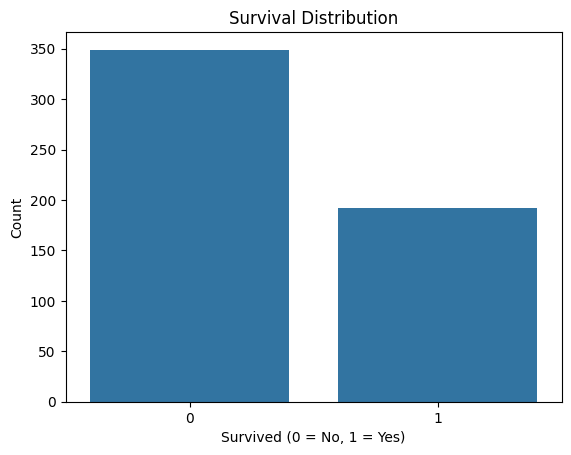

In [195]:
sns.countplot(x='survived', data=data)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Distribution')
plt.show()

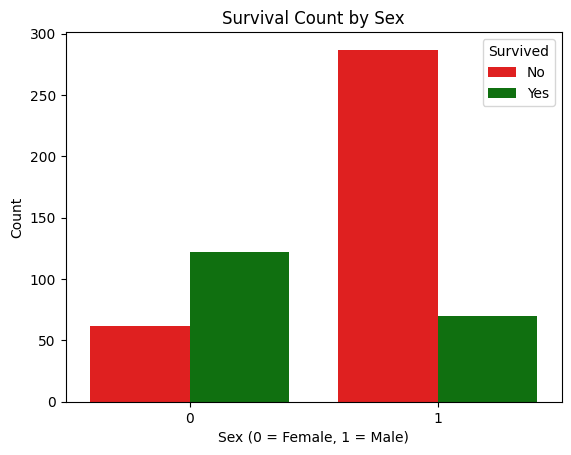

In [196]:
sns.countplot(x='sex',hue='survived',data=data, palette=['red','green'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

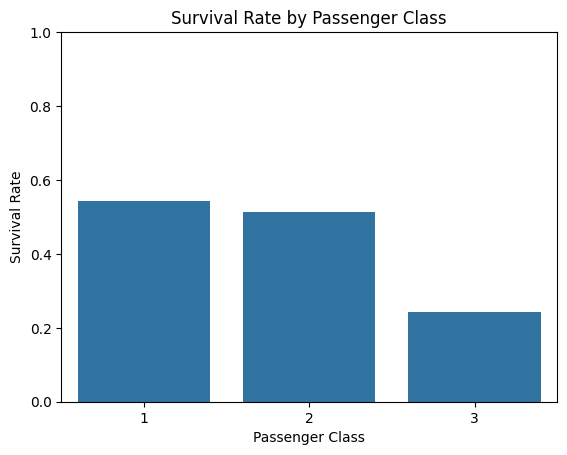

In [197]:
survival_rate = data.groupby('pclass')['survived'].mean()

sns.barplot(
    x=survival_rate.index,
    y=survival_rate.values
)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 1)
plt.show()


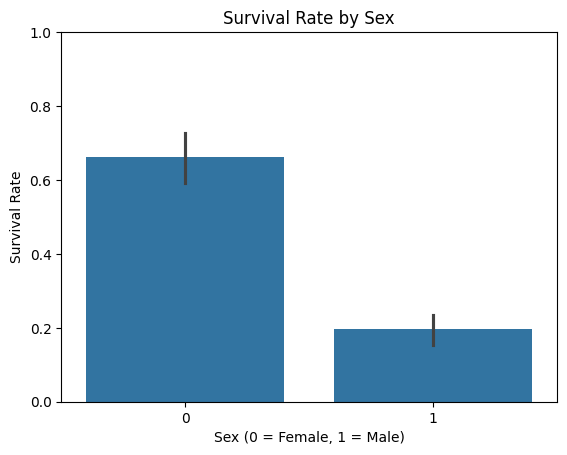

In [198]:
sns.barplot(
    x='sex',
    y='survived',
    data=data,
)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)
plt.show()

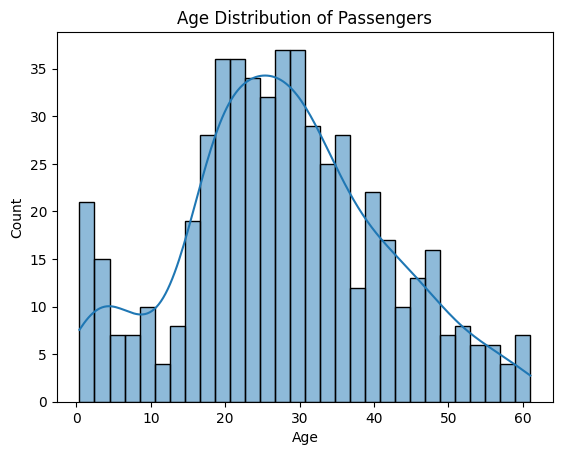

In [199]:
sns.histplot(
    data=data,
    x='age',
    kde=True,
    bins=30
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

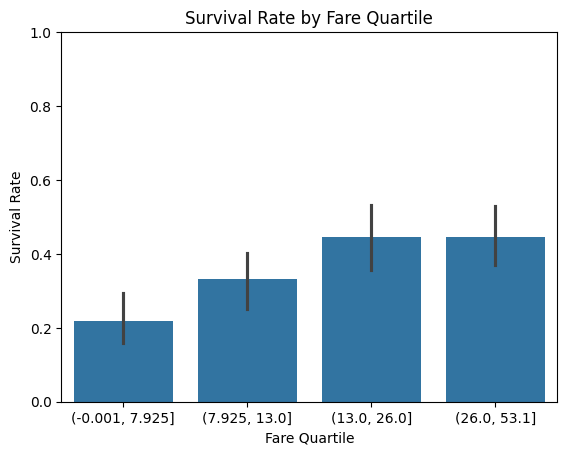

In [200]:
data['fare_bin'] = pd.qcut(data['fare'], 4)

sns.barplot(x='fare_bin', y='survived', data=data)
plt.ylabel('Survival Rate')
plt.xlabel('Fare Quartile')
plt.title('Survival Rate by Fare Quartile')
plt.ylim(0, 1)
plt.show()


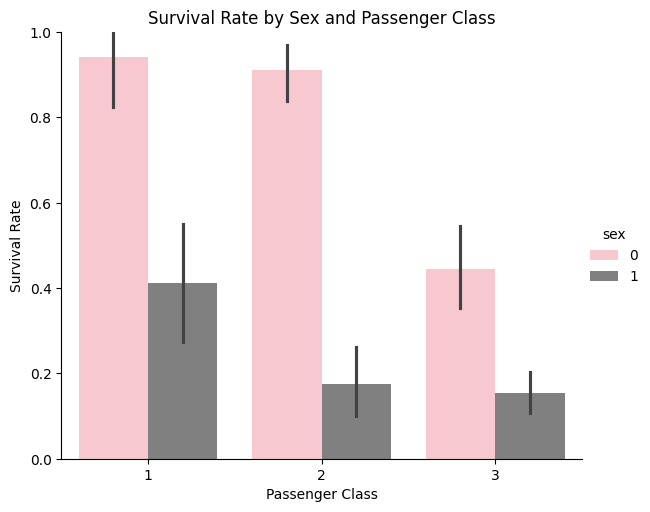

In [201]:
sns.catplot(
    x='pclass',
    y='survived',
    hue='sex',
    data=data,
    kind='bar',
    palette={0: 'pink', 1: 'grey'},
    height=5,
    aspect=1.2
)

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.title('Survival Rate by Sex and Passenger Class')
plt.show()

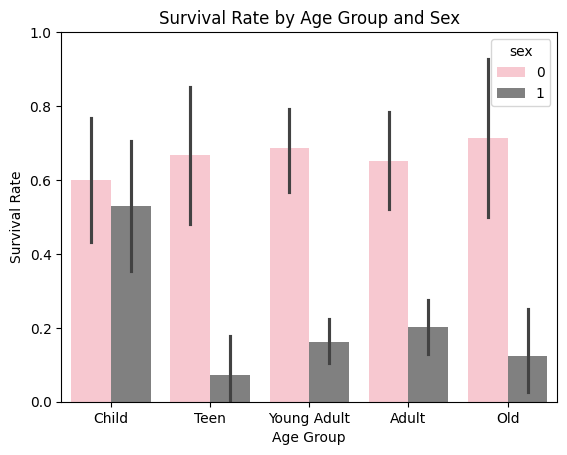

In [202]:
data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 12, 18, 30, 45, 60],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Old']
)


sns.barplot(
    x='age_group',
    y='survived',
    hue='sex',
    data=data,
    palette={0: 'pink', 1: 'grey'}
)

plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group and Sex')
plt.ylim(0, 1)
plt.show()

/tmp/ipython-input-337204145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


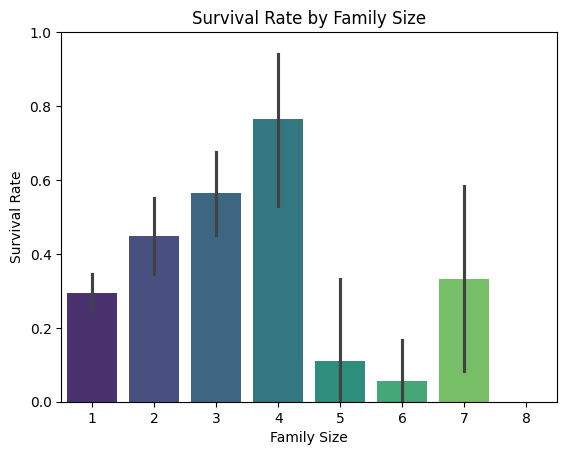

In [203]:
data['family_size'] = data['sibsp'] + data['parch'] + 1

sns.barplot(
    x='family_size',
    y='survived',
    data=data,
    estimator='mean',
    palette='viridis'
)

plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.ylim(0, 1)
plt.show()


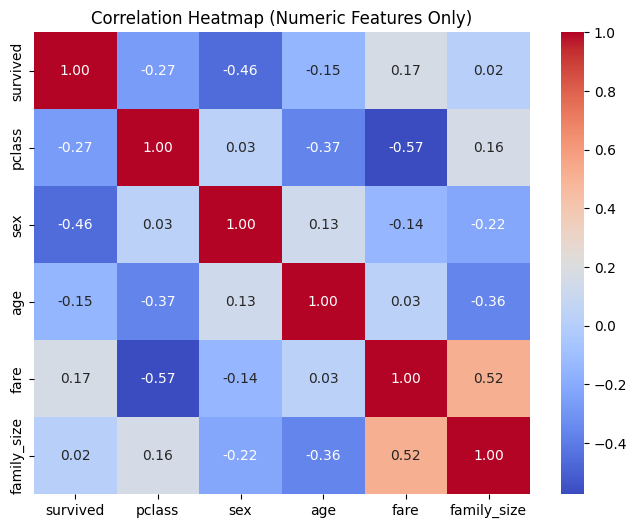

In [204]:
numeric_cols = ['survived', 'pclass', 'sex', 'age', 'fare', 'family_size']
numeric_data = data[numeric_cols]

corr = numeric_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


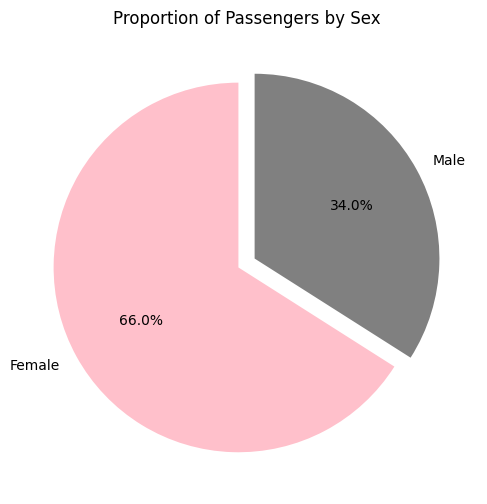

In [205]:

sex_counts = data['sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sex_counts,
    labels=['Female', 'Male'],  # assuming 0=Female, 1=Male
    autopct='%1.1f%%',
    colors=['pink', 'grey'],
    startangle=90,
    explode=(0.05, 0.05)  # optional: separate slices slightly
)
plt.title('Proportion of Passengers by Sex')
plt.show()


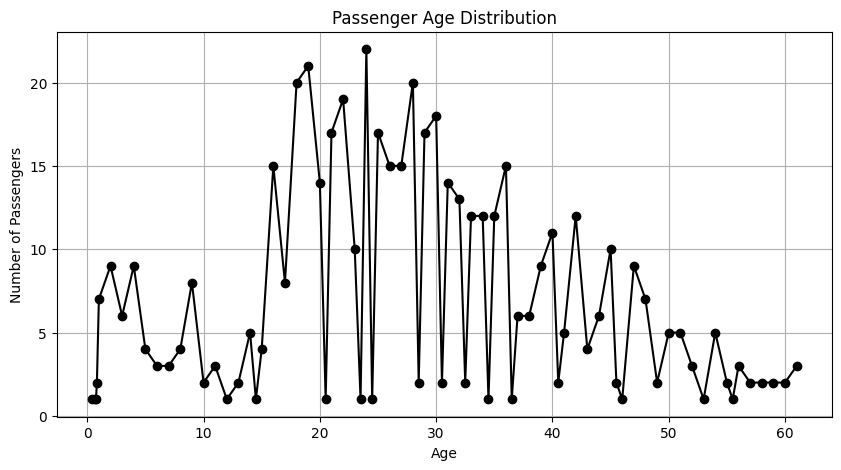

In [206]:
import matplotlib.pyplot as plt

# Count of passengers for each age
age_counts = data['age'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(age_counts.index, age_counts.values, marker='o', color='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passenger Age Distribution')
plt.grid(True)
plt.show()


In [327]:
# Save the updated dataframe
data.to_csv('titanic_updated.csv', index=False)

from google.colab import files
files.download('titanic_updated.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Machine Learning Model selection and Training

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     541 non-null    int64   
 1   pclass       541 non-null    int64   
 2   sex          541 non-null    int64   
 3   age          541 non-null    float64 
 4   fare         541 non-null    float64 
 5   sibsp        541 non-null    int64   
 6   parch        541 non-null    int64   
 7   fare_bin     541 non-null    category
 8   age_group    538 non-null    category
 9   family_size  541 non-null    int64   
dtypes: category(2), float64(2), int64(6)
memory usage: 39.5 KB


In [324]:
#Importing Required Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [213]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'sibsp', 'parch',
       'fare_bin', 'age_group', 'family_size'],
      dtype='object')

In [226]:
#Feature selection

x = data[['pclass', 'sex', 'age', 'fare', 'family_size']]
y = data['survived']

In [320]:
#Data spliting

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [321]:
#Model Creation

model = RandomForestClassifier()
model

RandomForestClassifier()

In [322]:
#Model Training

model.fit(x_train, y_train)

RandomForestClassifier()

In [326]:
predict = model.predict(x_test)

acc = accuracy_score(predict, y_test)
print("Accuracy : ",acc*100,'%')

Accuracy :  83.43558282208589 %


In [325]:
pickle.dump(model,open("Titanic_ML_model.pkl","wb"))
print("PKL file created successfully!")

PKL file created successfully!
